In [ ]:
import numpy as np
import problem_1 as mz
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

# Description of the maze as a numpy array
maze = np.array([
      [0, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 1, 0, 0, 1, 0, 0],
      [0, 0, 1, 0, 0, 1, 1, 1],
      [0, 0, 1, 0, 0, 1, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0],
      [0, 1, 1, 1, 1, 1, 1, 0],
      [0, 0, 0, 0, 1, 2, 0, 0],
])
# 0 = empty cell
# 1 = obstable
# 2 = Exit / Minotaur

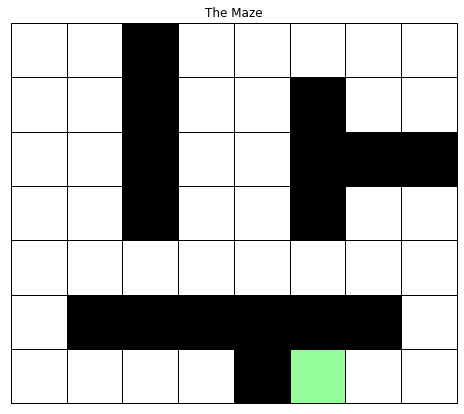

In [ ]:
mz.draw_maze(maze)

# Solving the problem with finite time horizon

In [ ]:
# Create an environment maze
env = mz.Maze(maze, minotaur_cant_stay = True)
#env = mz.Maze(maze)

Dynamic programming

In [ ]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon)

start  = (0,0,6,5)
start_state = env.map[start]
print(f"Maximal probability of exiting the maze {V[start_state,0]}")

Maximal probability of exiting the maze 1.0


In [ ]:
method = 'DynProg'
path = env.simulate(start, policy, method)

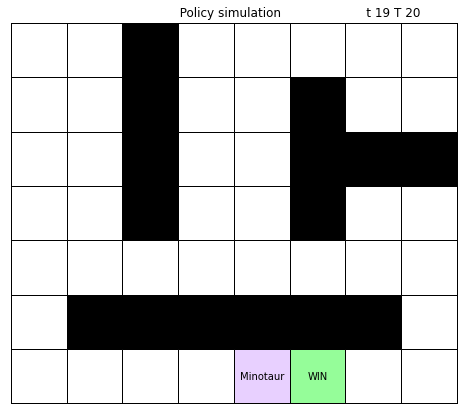

In [ ]:
# Play the game 
mz.animate_solution(maze, path)

**Maximal probability of exiting the maze w.r.t T when minotaur CANNOT stay**

100%|██████████| 31/31 [02:32<00:00,  4.91s/it]


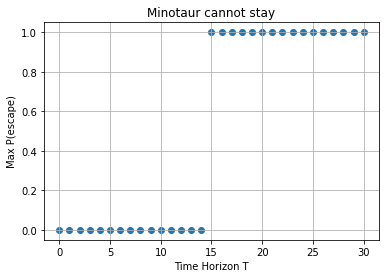

In [ ]:
env = mz.Maze(maze, minotaur_cant_stay=True)
start  = (0,0,6,5)
start_state = env.map[start]
max_probs = []
for T in tqdm(range(0,31)):
    horizon = T    
    # Solve the MDP problem with dynamic programming 
    V, policy= mz.dynamic_programming(env,horizon)
    # Value of start state at t=0
    max_probs.append(V[start_state, 0]) 
_ = plt.title("Minotaur cannot stay")
_ = plt.grid("on")
_ = plt.xlabel("Time Horizon T")
_ = plt.ylabel("Max P(escape)")
_ = plt.scatter(range(0,len(max_probs)), max_probs)
_ = plt.savefig("Minotaur cannot stay.png")

**Maximal probability of exiting the maze w.r.t T when minotaur CAN stay**

100%|██████████| 30/30 [02:26<00:00,  4.89s/it]


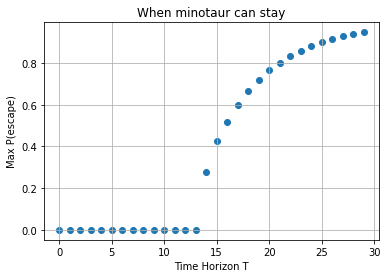

In [ ]:
# Maximal probability of exiting the maze w.r.t T when minotaur can stay
env = mz.Maze(maze, minotaur_cant_stay=False)
start  = (0,0,6,5)
start_state = env.map[start]
max_probs = []
for T in tqdm(range(1,31)):
    horizon = T    
    # Solve the MDP problem with dynamic programming 
    V, policy= mz.dynamic_programming(env,horizon)
    # Value of start state at t=0
    max_probs.append(V[start_state, 0]) 
_ = plt.title("When minotaur can stay")
_ = plt.grid("on")
_ = plt.xlabel("Time Horizon T")
_ = plt.ylabel("Max P(escape)")
_ = plt.scatter(range(0,len(max_probs)), max_probs)
_ = plt.savefig("When minotaur can stay.png")

# Solving the problem with infinite time horizon

Value Iteration

In [ ]:
env = mz.Maze(maze, minotaur_cant_stay=True)
start  = (0,0,6,5)
start_state = env.map[start]
# Mean lifetime
mean_lifetime = 30
# Discount Factor 
gamma   = 1 - (1/mean_lifetime);
# Accuracy threshold 
epsilon = 0.0001
V, policy = mz.value_iteration(env, gamma, epsilon)

Maximal probability of exiting the maze 0.7385691026454033


In [ ]:
method = 'ValIter'
path = env.simulate(start, policy, method)

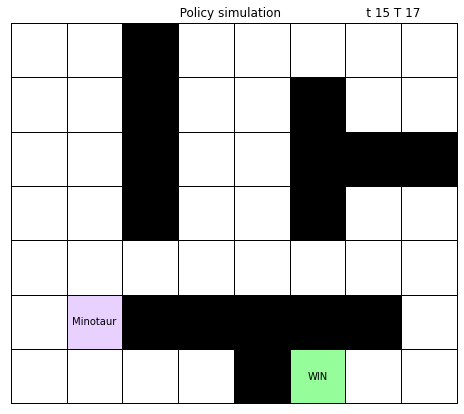

In [ ]:
# Play the game 
mz.animate_solution(maze, path)

**Simulate 10,000 games to evaluate the policy**

In [ ]:
method = 'ValIter'
sims = 10000
wins = 0
for i in range(sims):
    path = env.simulate(start, policy, method)
    if path[-1] == 'WIN':
        wins += 1
print(f"Probability of exiting the maze {wins/sims}")

Probability of exiting the maze 1.0
